In [1]:
import pandas as pd

#############################################
# Setup and Conversion
#############################################

df = pd.read_csv("mobiles_dataset.csv")

print(df.head())

  Company.Name            Model.Name Mobile.Weight  RAM Front.Camera  \
0        Apple       iPhone 16 128GB          174g  6GB         12MP   
1        Apple       iPhone 16 256GB          174g  6GB         12MP   
2        Apple       iPhone 16 512GB          174g  6GB         12MP   
3        Apple  iPhone 16 Plus 128GB          203g  6GB         12MP   
4        Apple  iPhone 16 Plus 256GB          203g  6GB         12MP   

  Back.Camera   Processor  Battery.Capacity.mAh  Screen.Size.inches  \
0        48MP  A17 Bionic                  3600                 6.1   
1        48MP  A17 Bionic                  3600                 6.1   
2        48MP  A17 Bionic                  3600                 6.1   
3        48MP  A17 Bionic                  4200                 6.7   
4        48MP  A17 Bionic                  4200                 6.7   

   Launched.Price.Pakistan.PKR  Launched.Price.India.INR  \
0                       224999                     79999   
1                   

In [5]:
# Convert currencies
conversion_rates = {
    "Launched.Price.Pakistan.PKR": 0.0036,
    "Launched.Price.India.INR": 0.011,
    "Launched.Price.China.CNY": 0.14,
    "Launched.Price.Dubai.AED": 0.27
}

df["Launched.Price.Pakistan.PKR"] *= conversion_rates["Launched.Price.Pakistan.PKR"]
df["Launched.Price.India.INR"] *= conversion_rates["Launched.Price.India.INR"]
df["Launched.Price.China.CNY"] *= conversion_rates["Launched.Price.China.CNY"]
df["Launched.Price.Dubai.AED"] *= conversion_rates["Launched.Price.Dubai.AED"]

df_usd = df.rename(columns={
    "Launched.Price.Pakistan.PKR": "Launched.Price.Pakistan.USD",
    "Launched.Price.India.INR": "Launched.Price.India.USD",
    "Launched.Price.China.CNY": "Launched.Price.China.USD",
    "Launched.Price.Dubai.AED": "Launched.Price.Dubai.USD"
})

df_avg_brand = df_usd.groupby("Company.Name")[[
    "Launched.Price.Pakistan.USD",
    "Launched.Price.India.USD",
    "Launched.Price.China.USD",
    "Launched.Price.Dubai.USD"
]].mean()

print(df_avg_brand)

              Launched.Price.Pakistan.USD  Launched.Price.India.USD  \
Company.Name                                                          
Apple                          891.460318               1132.984577   
Google                         620.567829                773.655667   
Honor                          432.629367                537.357132   
Huawei                         660.725143               1130.784286   
Infinix                        158.074971                190.524714   
Lenovo                         226.796400                279.316400   
Motorola                       329.686723                370.618032   
Nokia                          186.476400                146.839000   
OnePlus                        485.317291                503.083340   
Oppo                           341.521981                481.342946   
POCO                           209.996400                249.139000   
Poco                           247.392000                274.989000   
Realme

In [7]:
#############################################
# Part 1: Analytical Questions
#############################################

# 1. Does battery capacity influence the launched price of a smartphone? Check this variability across all currencies. Is there any type of difference between behaviors?
price_columns = [
    "Launched.Price.Pakistan.USD",
    "Launched.Price.India.USD",
    "Launched.Price.China.USD",
    "Launched.Price.USA.USD",
    "Launched.Price.Dubai.USD"
]


df_usd["Average.Launched.Price.USD"] = df_usd[price_columns].mean(axis=1)
correlation_value = df_usd[["Battery.Capacity.mAh", "Average.Launched.Price.USD"]].corr().iloc[0, 1]
print(f"Correlation between Battery Capacity and Average Launched Price (USD): {correlation_value:.4f}")

Correlation between Battery Capacity and Average Launched Price (USD): -0.0423


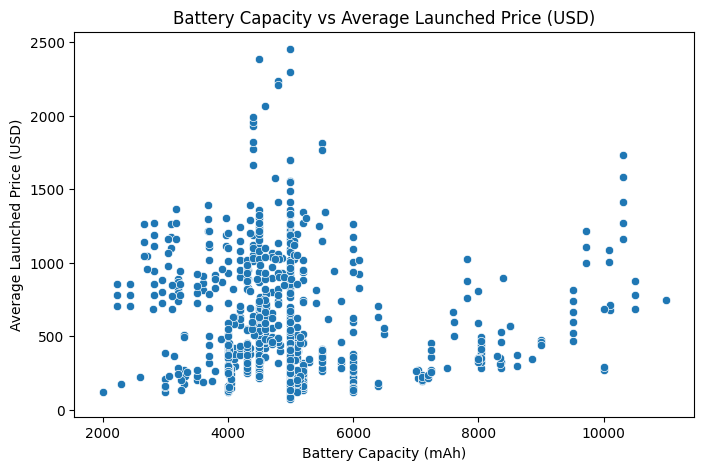

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_usd, x="Battery.Capacity.mAh", y="Average.Launched.Price.USD")
plt.title("Battery Capacity vs Average Launched Price (USD)")
plt.xlabel("Battery Capacity (mAh)")
plt.ylabel("Average Launched Price (USD)")
plt.show()

Interpreting the correlation and scatter plot:
A correlation of -0.0423 indicates a weak negative relationship between battery capacity and average launched price in USD - Almost no correlation.

This could mean that while a battery size is increased some other factors are worse, lowering the price

The scatter plot also shows no clear pattern between the two variables.

In [23]:
# 2. Does RAM size impact the price of smartphones? Check this variability across all currencies. Is there any type of difference between behaviors?

df_usd["RAM_numeric"] =  df["RAM"].str.extract(r'(\d+)').astype(float)
df_usd = df_usd.dropna(subset=["RAM_numeric"])

ram_correlation = df_usd[["RAM_numeric", "Average.Launched.Price.USD"]].corr().iloc[0, 1]
print(f"Correlation between RAM size and Average Launched Price (USD): {ram_correlation:.4f}")


Correlation between RAM size and Average Launched Price (USD): 0.4476


The correlation of 0.4476 indicates a moderate positive relationship between RAM size and average launched price in USD.
This means that as the RAM size increases, the average launched price tends to increase as well.

In [81]:
# 3. Do Apple devices have a higher price variation across different regions compared to other brands? In which country do Apple devices have the highest markup? Are there brands with more stable pricing across regions?

brand_price_variation = df_usd.groupby("Company.Name")[price_columns].std()

print(brand_price_variation)

              Launched.Price.Pakistan.USD  Launched.Price.India.USD  \
Company.Name                                                          
Apple                          278.189461                324.608362   
Google                         288.203500                394.857611   
Honor                          327.685524                410.058511   
Huawei                         305.001274                758.070602   
Infinix                         79.719779                 88.910469   
Lenovo                         192.524284                206.292033   
Motorola                       228.772730                254.376849   
Nokia                           53.767499                 49.672846   
OnePlus                        229.454713                215.567521   
Oppo                           185.822420                325.040167   
POCO                            92.187216                105.282146   
Poco                            12.727922                 15.556349   
Realme

In [82]:
apple_variation = df_usd[df_usd["Company.Name"] == "Apple"][price_columns].std()
other_brands_variation = df_usd[df_usd["Company.Name"] != "Apple"][price_columns].std()

print("Apple Price Variation Across Regions:\n", apple_variation)
print("\nOther Brands Price Variation Across Regions:\n", other_brands_variation)

Apple Price Variation Across Regions:
 Launched.Price.Pakistan.USD    278.189461
Launched.Price.India.USD       324.608362
Launched.Price.China.USD       249.298702
Launched.Price.USA.USD         247.896867
Launched.Price.Dubai.USD       234.097558
dtype: float64

Other Brands Price Variation Across Regions:
 Launched.Price.Pakistan.USD    337.642700
Launched.Price.India.USD       407.147433
Launched.Price.China.USD       351.633975
Launched.Price.USA.USD         399.757421
Launched.Price.Dubai.USD       407.805144
dtype: float64


The price variation of apple devices is generally lower compared to other brands, meaning more stable pricing across all of the regions.
For Apple, the highest markup is in India (324), and the 2nd highest is in Pakistan



In [83]:
# 4. Do all smartphone brands have flagship and budget-friendly models, or do some brands
# only focus on premium devices?
def categorize_price(price):
    if price < 300:
        return "Budget"
    elif 300 <= price <= 700:
        return "Mid-range"
    else:
        return "Premium"

df_usd.loc[:, "Price.Segment"] = df_usd["Average.Launched.Price.USD"].apply(categorize_price)

print(df_usd[["Company.Name", "Model.Name", "Average.Launched.Price.USD", "Price.Segment"]].head())

  Company.Name            Model.Name  Average.Launched.Price.USD Price.Segment
0        Apple       iPhone 16 128GB                   811.31508       Premium
1        Apple       iPhone 16 256GB                   858.71508       Premium
2        Apple       iPhone 16 512GB                   908.91508       Premium
3        Apple  iPhone 16 Plus 128GB                   904.11508       Premium
4        Apple  iPhone 16 Plus 256GB                   951.51508       Premium


In [84]:
brand_segment_count = df_usd.groupby(["Company.Name", "Price.Segment"]).size().unstack(fill_value=0)

print(brand_segment_count)


Price.Segment  Budget  Mid-range  Premium
Company.Name                             
Apple               1          6       90
Google              0         11       10
Honor              33         35       23
Huawei              0         17       23
Infinix            43         13        0
Lenovo             10          5        0
Motorola           27         29        6
Nokia              10          0        0
OnePlus             9         29       15
Oppo               41         66       22
POCO               19         11        0
Poco                2          0        0
Realme             44         25        0
Samsung            29         14       41
Sony                0          3        6
Tecno              20         10        9
Vivo               40         37        9
Xiaomi              7         10       10
iQOO                0          3        0


In [85]:
brand_segment_coverage = (brand_segment_count > 0).sum(axis=1)

brands_with_all_segments = brand_segment_coverage[brand_segment_coverage == 3].index.tolist()
print("\nBrands covering all three segments:", brands_with_all_segments)

brands_limited_segments = brand_segment_coverage[brand_segment_coverage < 3]
print("\nBrands that do NOT cover all segments:\n", brands_limited_segments)



Brands covering all three segments: ['Apple', 'Honor', 'Motorola', 'OnePlus', 'Oppo', 'Samsung', 'Tecno', 'Vivo', 'Xiaomi']

Brands that do NOT cover all segments:
 Company.Name
Google     2
Huawei     2
Infinix    2
Lenovo     2
Nokia      1
POCO       2
Poco       1
Realme     2
Sony       2
iQOO       1
dtype: int64


In [86]:
# 5. Which region offers the most affordable smartphone prices on average? Are there any brands that price their phones significantly lower in one region compared to others?
average_prices_by_region = df_usd[price_columns].mean()

print("Average smartphone prices per region:\n", average_prices_by_region)

Average smartphone prices per region:
 Launched.Price.Pakistan.USD    449.310052
Launched.Price.India.USD       551.399705
Launched.Price.China.USD       529.316490
Launched.Price.USA.USD         578.281690
Launched.Price.Dubai.USD       584.666717
dtype: float64


In [87]:
cheapest_region = average_prices_by_region.idxmin()
print(f"\nRegion with the most affordable smartphone prices: {cheapest_region}")


Region with the most affordable smartphone prices: Launched.Price.Pakistan.USD


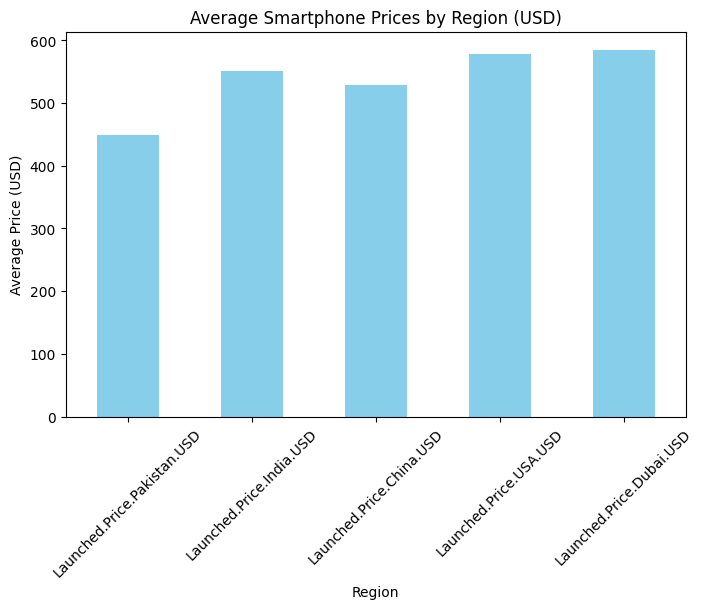

In [88]:
#############################################
# Part 2: Visualization
#############################################

# 1. Plot a bar chart for average price per region in USD.
plt.figure(figsize=(8,5))
average_prices_by_region.plot(kind="bar", color="skyblue")
plt.title("Average Smartphone Prices by Region (USD)")
plt.ylabel("Average Price (USD)")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()

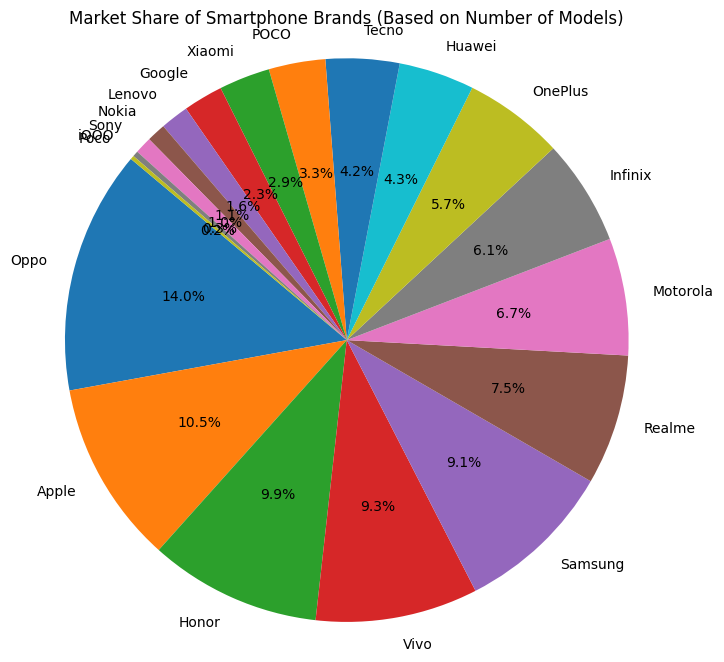

In [90]:
# 2. Create a pie chart of the market share of smartphone brands
brand_counts = df_usd["Company.Name"].value_counts()

plt.figure(figsize=(8,8))
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Market Share of Smartphone Brands (Based on Number of Models)")
plt.axis("equal")
plt.show()

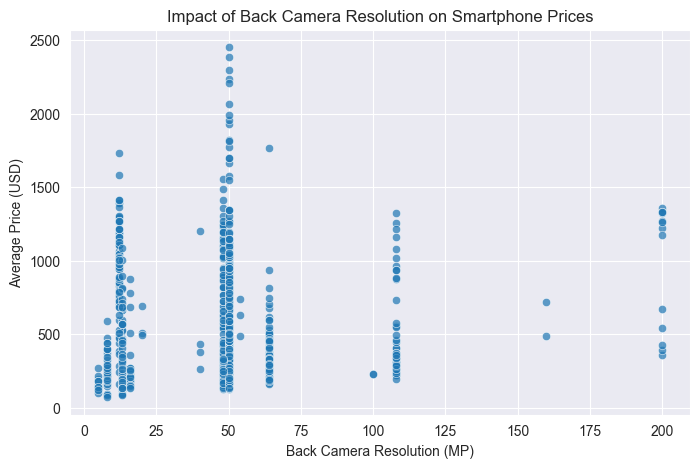

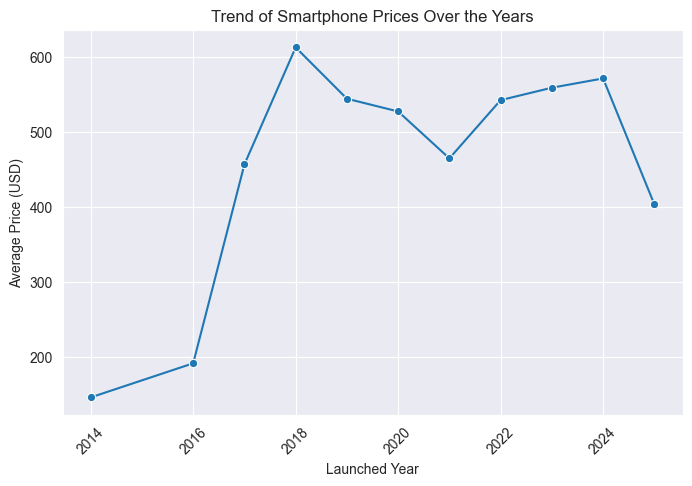

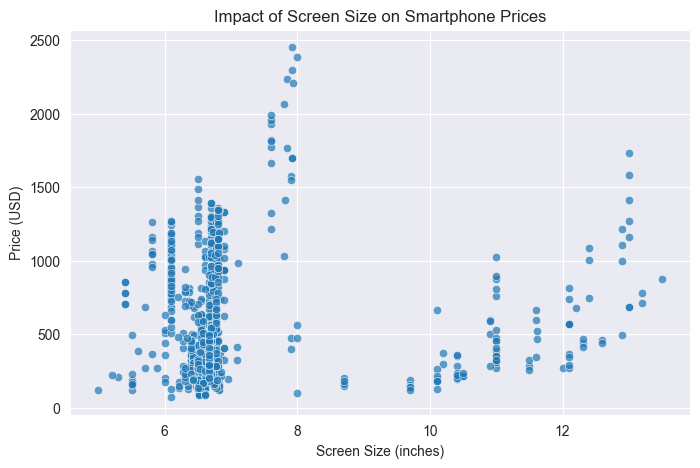

In [19]:
#############################################
# Part 4: Personal findings
#############################################

import matplotlib.pyplot as plt
import seaborn as sns
import re

# Let's create some more graphs to understand what other factors affect the prices of mobile phones.
df_temp = df_usd.copy()

# Function to extract the first numeric value from the "Back.Camera" column
def extract_first_number(camera_spec):
    match = re.search(r"\d+", str(camera_spec))
    return float(match.group()) if match else None

df_temp["Back.Camera.Numeric"] = df_temp["Back.Camera"].apply(extract_first_number)

# Scatter Plot: Price vs Back Camera Resolution
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_temp, x="Back.Camera.Numeric", y="Average.Launched.Price.USD", alpha=0.7)
plt.title("Impact of Back Camera Resolution on Smartphone Prices")
plt.xlabel("Back Camera Resolution (MP)")
plt.ylabel("Average Price (USD)")
plt.show()

# Line Graph: Price vs Launch Year
plt.figure(figsize=(8,5))
sns.lineplot(data=df_usd, x="Launched.Year", y="Average.Launched.Price.USD", marker="o", errorbar=None)
plt.title("Trend of Smartphone Prices Over the Years")
plt.xlabel("Launched Year")
plt.ylabel("Average Price (USD)")
plt.xticks(rotation=45)
plt.show()

# Scatter plot: Price vs Screen Size
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_usd, x="Screen.Size.inches", y="Average.Launched.Price.USD", alpha=0.7)
plt.title("Impact of Screen Size on Smartphone Prices")
plt.xlabel("Screen Size (inches)")
plt.ylabel("Price (USD)")
plt.show()


Using either R or Python, explain what else affects the prices of mobile phones. Summarize your
findings.

Based on the previous graphs and the ones above we can make the following conclusions:

1. Battery Capacity: There is no clear relationship between battery capacity and average launched price.
This could be simply because cheaper phones could prioritize battery life over other features.

2. RAM Size: There is a moderate positive relationship between RAM size and average launched price.
This means that although not directly proportional, as the RAM size increases, the average launched price tends to increase as well.

3. Screen Size: Since most screen sizes fall under 6-8 inches, its a bit difficult to see a clear pattern.
However, from the above scatter plot, we can see that there a slight positive relationship between screen size and average launched price.
Though, there are budget options for each of the screen sizes as well.

4. Back Camera Resolution: There is a slight positive relationship between back camera resolution and average launched price.
Similar to the screen size, from the scatter plot we can see that since most camera resolutions fall under 10-50 MP, its a bit difficult to see a clear pattern.
Some companies seem to offer higher resolution cameras at a lower price

5. Launch Year: There is a slight upward trend in smartphone prices over the years.
Although in the last year there seems to be a slight decrease in the average price.

Overall, the price of a smartphone is influenced by a combination of factors such as RAM size, camera resolution, screen size, and launch year.






